# GAUSSIAN NOISE
### <b>Stochastic Gradient Descent</b>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def SGD(l, grad_l, w0, D, batch_size, n_epochs, a, lam=0): 
    X, Y= D
    d,N=X.shape
    n_batch_per_epoch=int(N/batch_size)
    f_val=np.zeros((n_epochs,))
    x_val=np.zeros((n_epochs,d))
    grads=np.zeros((n_epochs,))
    err=np.zeros((n_epochs, ))
    w=w0
    batchInd=np.zeros(batch_size)
    shuffledInd=np.arange(N)

    for epoch in range(n_epochs):
        np.random.shuffle(shuffledInd)
        for k in range (n_batch_per_epoch):
            batchInd=shuffledInd[batch_size*k : batch_size*(k+1)]
            Mx=X[batchInd, :]
            My=Y[batchInd]
            M=(Mx, My)

            w=w0-a/N*grad_l(w0,M, lam)
            w0=w         
        err[epoch]=np.linalg.norm(grad_l(w,M, lam), 2)
    return f_val, w, grads, err

In [18]:

def vandermore(X, K):
    N=X.shape[0]
    phi=np.zeros((N,K))
    for j in range(K):
        phi[:,j]=X**j
    return phi

create dataset X_test

Text(0.5, 1.0, 'Datapoints')

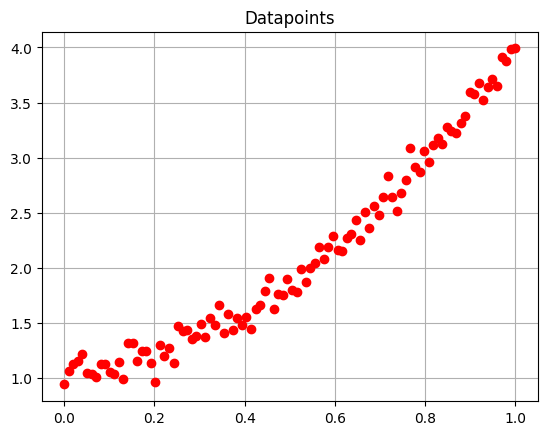

In [19]:
N=100 
K=4

a=0
b=1
theta_true=np.ones((K,))
X=np.linspace(a,b,N) 
phi=vandermore(X, K)
Y = phi @ theta_true 

sigma=0.1
Y=Y+sigma*np.random.normal(0,1,Y.shape)

plt.plot(X,Y, "o", color="red")
plt.grid()
plt.title("Datapoints")


# MLE

In [20]:
def l_mle(x,D, l=1):
    A,b=D
    res=(1/2)*np.linalg.norm(A@x-b)**2
    return res
def grad_l_mle(x,D, l=1):
    A,b=D
    return (A@x-b).T@A
def normalize(X):
    return (X - X.min()) / (X.max() - X.min())

Text(0.5, 1.0, 'MLE fit')

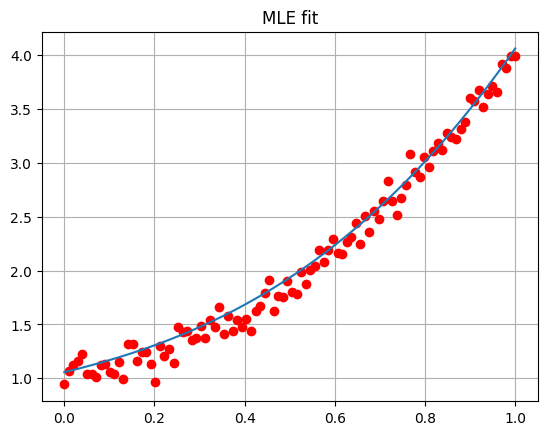

In [21]:
w0=np.ones((K,))
D=(normalize(phi), Y)
f_val, theta_mle, grads, err=SGD(l_mle, grad_l_mle, w0, D, batch_size=4, n_epochs=50, a=0.1)


XX=np.linspace(a,b,1000)
YY=vandermore(XX,K)@theta_mle
plt.plot(X,Y, "ro")
plt.plot(XX,YY)
plt.grid()
plt.title("MLE fit")


Text(0.5, 1.0, 'SGD error')

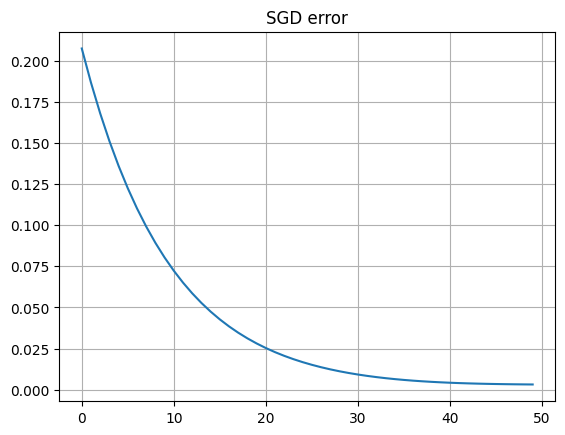

In [22]:
plt.figure()
plt.plot(err)
plt.grid()
plt.title("SGD error")

In [23]:
def test_Error(theta, phi, Y):
    result=np.linalg.norm(phi@theta-Y,2)**2
    N=Y.shape[0]
    return result/N

In [24]:
def fit_mle(D,K):
    x,y=D
    phi=vandermore(x,K)
    w0=np.ones((K,))
    D=(normalize(phi), y)
    f_val, theta_mle, grads, err= SGD(l_mle, grad_l_mle, w0, D, batch_size=1, n_epochs=50, a=0.1)
    return theta_mle

## different values of K

C:\Users\gnele\AppData\Local\Temp\ipykernel_4664\4157572509.py:9: RuntimeWarning: invalid value encountered in divide
  return (X - X.min()) / (X.max() - X.min())


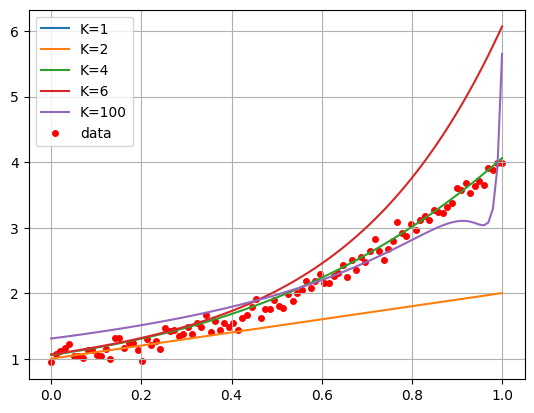

In [25]:
k_values=[1,2,4,6,100]
for K_trial in k_values:
    phi_trial=vandermore(X, K_trial)
    w0=np.ones((K_trial,))
    D=(normalize(phi_trial), Y)
    f_val, theta_mle_t, grads, err=SGD(l_mle, grad_l_mle, w0, D, batch_size=1, n_epochs=50, a=0.1)
    plt.plot(X, phi_trial@theta_mle_t, label="K="+str(K_trial), zorder=2)

plt.plot(X,Y, "ro", markersize=4, label="data", zorder=1)
plt.legend()
plt.grid()

Test and train error for different values of K

C:\Users\gnele\AppData\Local\Temp\ipykernel_4664\4157572509.py:9: RuntimeWarning: invalid value encountered in divide
  return (X - X.min()) / (X.max() - X.min())


Text(0, 0.5, 'error')

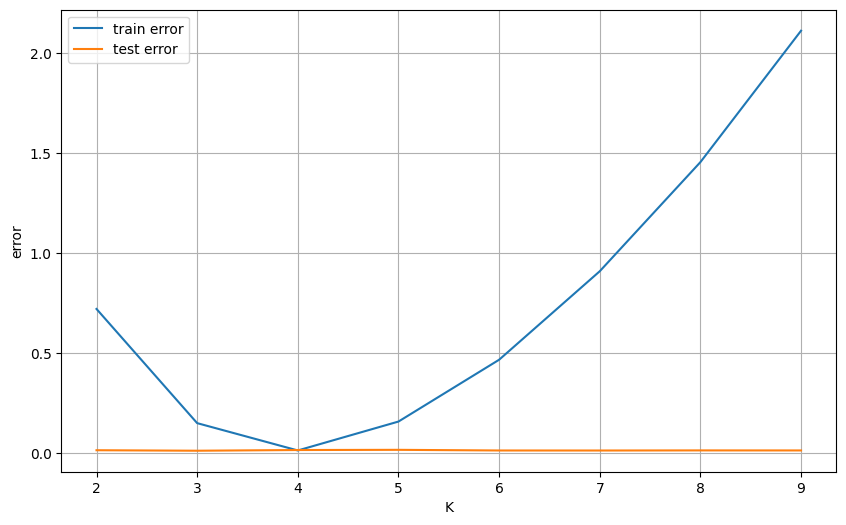

In [26]:
N_test=50
X_test=np.linspace(a,b,N_test)
test_error_mle=[]
train_error_mle=[]
k_values=np.arange(1,10)
for K_trial in k_values:
    theta_true=np.ones((K_trial,))
    Y_test=vandermore(X_test,K_trial)@theta_true
    Y_test=Y_test+sigma*np.random.normal(0,1,Y_test.shape)
    theta_train=fit_mle((X,Y), K_trial)
    phi_test=vandermore(X_test, K_trial)
    phi_train=vandermore(X, K_trial)
    test_error_mle.append(test_Error(theta_train, phi_test, Y_test))
    train_error_mle.append(test_Error(theta_train, phi_train, Y))

        
plt.figure(figsize=(10,6))
plt.plot(k_values, train_error_mle, label="train error")
plt.plot(k_values, test_error_mle, label="test error")
plt.legend()
plt.grid()
plt.xlabel("K")
plt.ylabel("error")

# MAP 


In [27]:
def l_map(x,D, l):
    A,b=D
    res=(1/2)*(np.linalg.norm((A@x-b))**2 + l*np.linalg.norm(x)**2)
    return res

def grad_l_map(x,D, l):
    A,b=D
    return (A@x-b).T@A + l*x

def fit_map(D, K, lam):
    x,y=D
    phi=vandermore(x,K)
    w0=np.ones((K,))
    D=(normalize(phi), y)
    f_val, theta_map, grads, err=SGD(l_map, grad_l_map, w0, D, batch_size=1, n_epochs=50, a=0.1, lam=lam)
    return theta_map

Text(0.5, 0.98, 'MAP for different K and lambda')

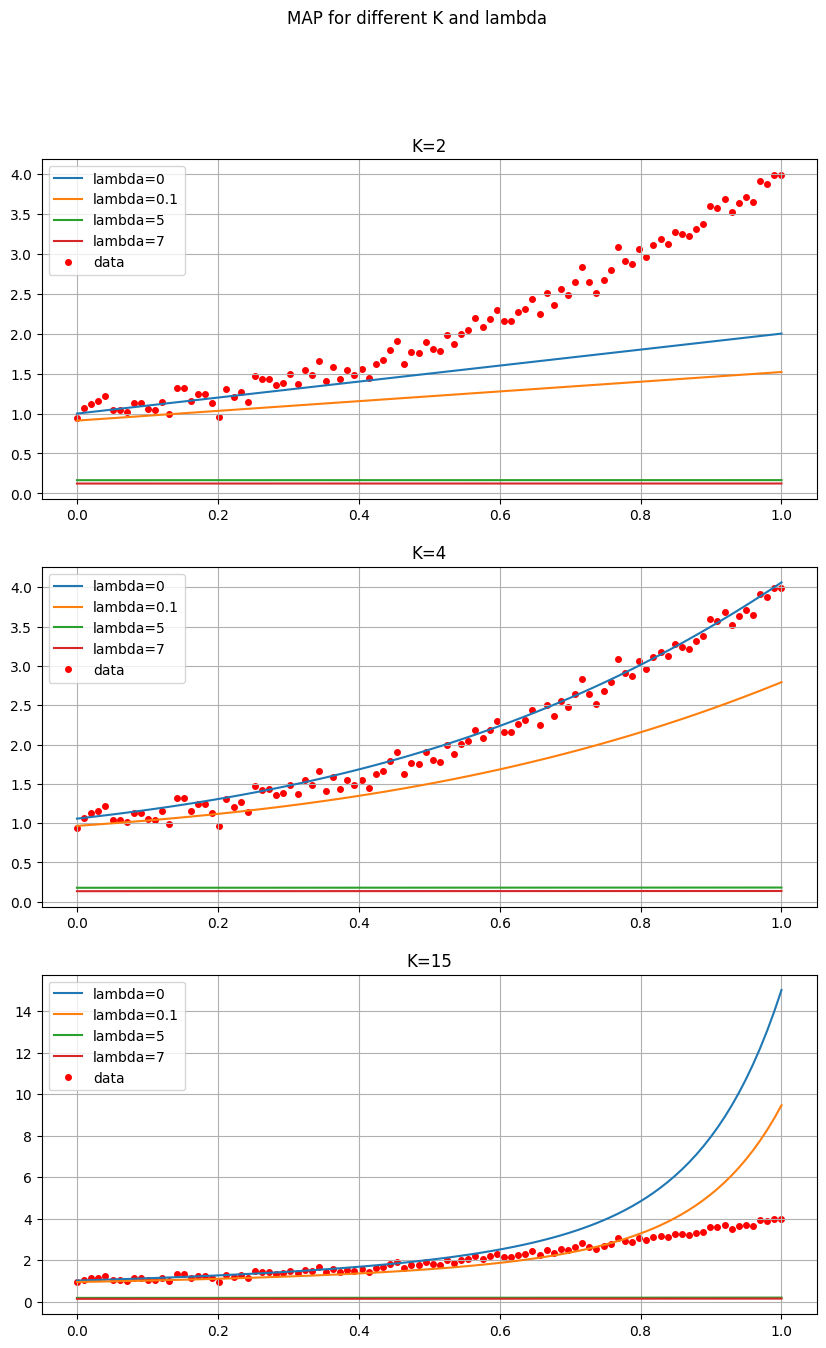

In [28]:
l_val=[0,0.1,5,7]
k_val=[2,4,15]
plt.figure(figsize=(10,15))
i=0
for K_trial in k_val:
    i+=1
    for l_trial in l_val:
        phi_trial=vandermore(X, K_trial)
        theta_map=fit_map((X,Y), K_trial, l_trial)
        plt.subplot(3,1, i)
        plt.plot(X, phi_trial@theta_map, label="lambda="+str(l_trial))
    plt.plot(X,Y, "ro", markersize=4, label="data", zorder=1)
    plt.grid()
    plt.legend()
    plt.title("K="+str(K_trial))
plt.suptitle("MAP for different K and lambda")

For K being <b>way greater</b> than the correct degree of the polynomial (>>4), compute the MLE and MAP<br>
solution. Compare the test error of the two, for different values of λ (in the case of MAP).

MLE error:  0.10570582436959343
MAP error: 
    lambda= 0 -> 0.10809437143644075
    lambda= 0.1 -> 0.07870796802253263
    lambda= 5 -> 2.6641294758540885
    lambda= 7 -> 3.140045728965183


Text(0.5, 0.98, 'K=100')

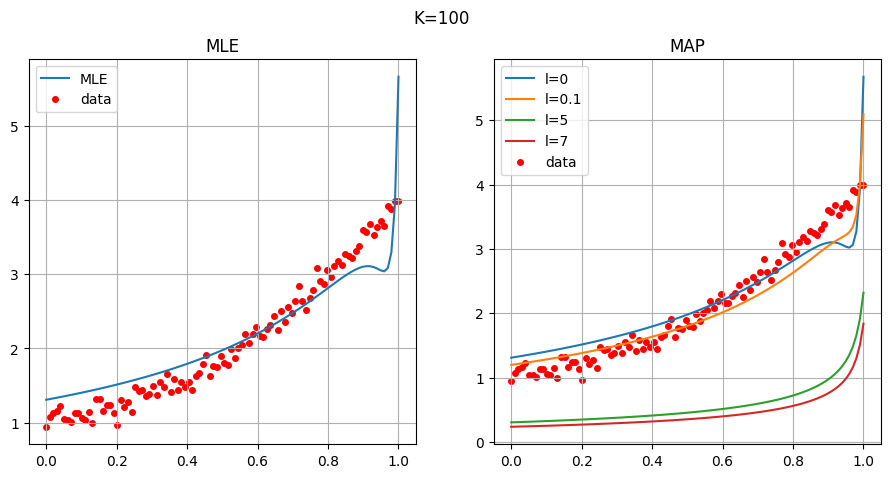

In [29]:
K=100
phi=vandermore(X, K)
theta_MLE=fit_mle((X,Y), K)
mle_error=test_Error(theta_MLE, phi, Y)
print("MLE error: ", mle_error)
fig, axes=plt.subplots(nrows=1,ncols=2, figsize=(11,5), sharex=True, sharey=False)

axes[0].plot(X, phi@theta_MLE, label="MLE", zorder=2)
axes[0].plot(X,Y, "ro", markersize=4, label="data", zorder=1)
axes[0].legend()
axes[0].grid()
print("MAP error: ")
for l in l_val:
    theta_map=fit_map((X,Y), K, l)
    map_error=test_Error(theta_map, phi, Y)
    print("    lambda=", l, "->", map_error)
    axes[1].plot(X, phi@theta_map, label="l="+str(l), zorder=2)
axes[1].plot(X,Y, "ro", markersize=4, label="data", zorder=1)
axes[1].legend()
axes[1].grid()
plt.subplot(1,2,1)
plt.title("MLE")
plt.subplot(1,2,2)
plt.title("MAP")
plt.suptitle("K="+str(K))


Define $Err(\theta)=\frac{||\theta-\theta_{true}||}{||\theta_{true}||}$, then compare Err($\theta_{MLE}$) and Err($\theta_{MAP}$) for different values of K and λ.

In [30]:
def err(theta, theta_true):
    if(theta_true.shape[0]<theta.shape[0]):
        theta_true=np.concatenate((theta_true, np.zeros(theta.shape[0]-theta_true.shape[0])))
    err=np.linalg.norm(theta-theta_true)
    err=err/np.linalg.norm(theta_true)
    return err
K=4
phi=vandermore(X, K)
theta_true_mle=fit_mle((X,Y), K)
theta_true_map=fit_map((X,Y), K, 0)
k_val=[30,50,70]
l_val=[0,1,5,15]
for k in k_val:
    theta_mle=fit_mle((X,Y), k)
    print("k=", k)
    print(" MLE error=", err(theta_mle, theta_true_mle))
    print(" MAP error")
    for l in l_val:
        theta_map=fit_map((X,Y), k, l)
        print(" l=",l,"->", err(theta_map, theta_true_map))
    
    print("")

k= 30
 MLE error= 2.5101825756203824
 MAP error
 l= 0 -> 2.5103676378739683
 l= 1 -> 0.8488982640704319
 l= 5 -> 0.9441096045394038
 l= 15 -> 0.9782229456465842

k= 50
 MLE error= 3.3384429217375255
 MAP error
 l= 0 -> 3.3386889160860678
 l= 1 -> 0.7973696935300439
 l= 5 -> 0.9245813603541229
 l= 15 -> 0.970459365250854

k= 70
 MLE error= 3.9914654859322343
 MAP error
 l= 0 -> 3.991759460765265
 l= 1 -> 0.7127929228737607
 l= 5 -> 0.8918695760507113
 l= 15 -> 0.9588406643554963

